### Importing dependencies

In [3]:
import pandas as pd
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

### Loading and derivating data for future analisys

In [4]:
data = pd.read_csv('../dataset_bacteria.csv')

### Preparing training data

In [5]:
y = data.iloc[:,4]
x = data.iloc[:,[1,3]]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30, random_state = 0)

### Creating SVC Models and building analisys graphs (gamma variation = 0.05)

In [6]:
row = 0
scores = []
for n in range(0,20):
    column = (n % 5)
    if column == 0 and n > 0:
        row = row + 1
        
    svc = SVC(kernel='rbf', gamma = (n * 0.05) + 0.01)
    svc.fit(x_train,y_train)
    y_pred= svc.predict(x_test)
    cm = confusion_matrix(y_test,y_pred)
    score = svc.score(x_test,y_test)
    scores.append(score)
    #print(score)



### Ploting scores for gamma variation

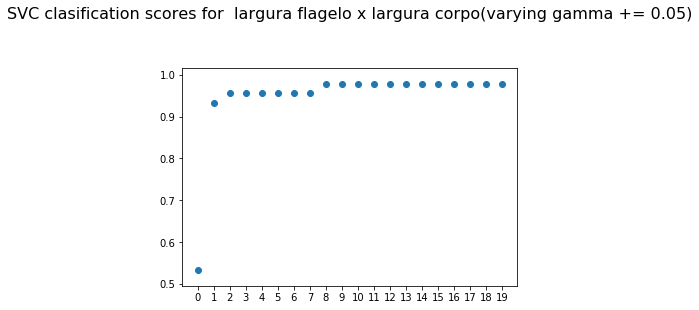

In [7]:
x_axis = [i for i in range(0,20)]
plt.scatter(x_axis, scores)
plt.title("SVC clasification scores for  largura flagelo x largura corpo(varying gamma += 0.05)", fontsize=16, y=1.20)
plt.xticks(x_axis)
plt.show()

#### Therefore, we conclude that any gamma, being gamma >= 0.4, leads to the same score. So, from now one, we are going to use gamma = 1

### Creating SVC Models and building analisys graphs (gamma constant, C variation = 0.05)

In [8]:
row = 0
scores = []
for n in range(0,20):
    column = (n % 5)
    if column == 0 and n > 0:
        row = row + 1
        
    svc = SVC(kernel='rbf', gamma = 1, C = (n * 0.05) if n != 0 else (n * 0.05) + 0.01)
    
    #print(score)
    
    svc.fit(x_train,y_train)
    y_pred= svc.predict(x_test)
    cm = confusion_matrix(y_test,y_pred)
    score = svc.score(x_test,y_test)
    scores.append(score)

### Ploting Score for C variation

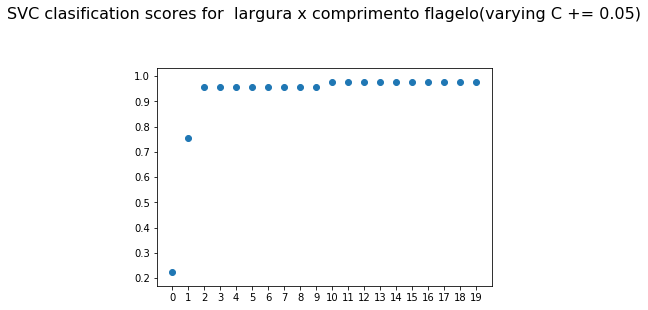

In [9]:
x_axis = [i for i in range(0,20)]
plt.scatter(x_axis, scores)
plt.title("SVC clasification scores for  largura x comprimento flagelo(varying C += 0.05)", fontsize=16, y=1.20)
plt.xticks(x_axis)
plt.show()

#### Therefore, we conclude that any C, being C >= 0.5, leads to the same optimal result. So, from now one, we are using C = 1

### Creating SVC Models and building analisys graphs (changing probability value)

In [10]:
#default way

svc = SVC(kernel='rbf', gamma = 1, C = 1, probability=False)

scores = []

svc.fit(x_train,y_train)
y_pred= svc.predict(x_test)

score = svc.score(x_test, y_test)
scores.append(score)

In [11]:
#setting probability to true

svc = SVC(kernel='rbf', gamma = 1, C = 1, probability=True)

svc.fit(x_train,y_train)
y_pred= svc.predict(x_test)

score = svc.score(x_test, y_test)
scores.append(score)

#print(scores)

### Ploting Score for probability variation

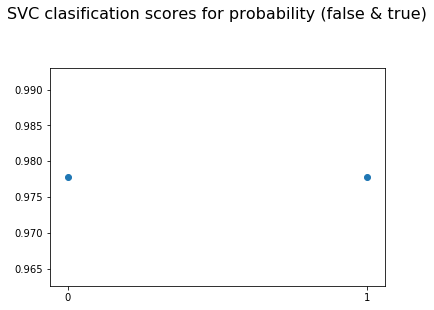

In [12]:
x_axis = [i for i in range(0,2)]
plt.scatter(x_axis, scores)
plt.title("SVC clasification scores for probability (false & true)", fontsize=16, y=1.20)
plt.xticks(x_axis)
plt.show()

#### Therefore, we conclude that the probability attribute, being true or false, does not interfers in the score of the algorithm

### Creating SVC Models and building analisys graphs (changing shrinking value)

In [13]:
#default way

svc = SVC(kernel='rbf', gamma = 1, C = 1, probability=False, shrinking=True)

scores = []

svc.fit(x_train,y_train)
y_pred= svc.predict(x_test)

score = svc.score(x_test, y_test)
scores.append(score)

In [14]:
#setting shrinking to false

svc = SVC(kernel='rbf', gamma = 1, C = 1, probability=False, shrinking= False)

svc.fit(x_train,y_train)
y_pred= svc.predict(x_test)

score = svc.score(x_test, y_test)
scores.append(score)

### Ploting score graph for shrinking variation

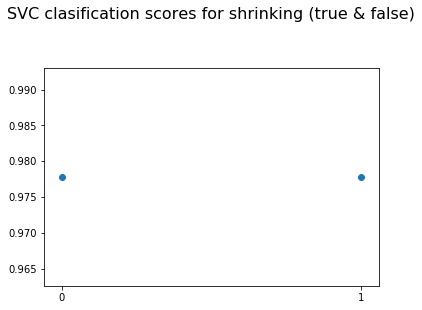

In [15]:
x_axis = [i for i in range(0,2)]
plt.scatter(x_axis, scores)
plt.title("SVC clasification scores for shrinking (true & false)", fontsize=16, y=1.20)
plt.xticks(x_axis)
plt.show()

#### Therefore, we conclude that the shrinking attribute, being true or false, does not interfers in the score of the algorithm

## Conclusion

#### Through this demonstrations, we were able to conclude that the optimum parameters for this rbf kerneled svc , using largura flagelo and comprimento flagelo as features is:
    
   * gamma >= 0.4 (auto = default in rbf kernel is 1/n_features, in our case 0.25)
   * C >= 0.5 (default is 1)
   * probability = true or false (being true or false does not affect the score, by default is set as false)
   * shrinking = true or false (being true or false does not affect the score, by default is set as true)
        
### And the biggest optimization achieved as score: 0.9777

In [16]:
svc.score(x_test,y_test)

0.97777777777777775

In [17]:
from sklearn.externals import joblib

joblib.dump(svc, '../Modelos/svmBacteria.sav')

['../Modelos/svmBacteria.sav']